### *Theoretical*



#### **1. What is K-Nearest Neighbors (KNN) and how does it work?**  
KNN is a **supervised learning algorithm** used for **classification and regression**. It works by:  
- Storing the entire dataset.  
- For a new data point, calculating the distance from all existing data points.  
- Selecting the **K nearest neighbors** based on a chosen distance metric (e.g., Euclidean distance).  
- For classification: The majority class among the neighbors is assigned to the new point.  
- For regression: The average (or weighted average) of the neighbors’ values is assigned to the new point.

#### **2. What is the difference between KNN Classification and KNN Regression?**  
- **KNN Classification:** The majority class among K nearest neighbors determines the class of the new point.  
- **KNN Regression:** The predicted value is the **average (or weighted average)** of K nearest neighbors’ values.  

#### **3. What is the role of the distance metric in KNN?**  
The distance metric determines how **closeness** is measured between data points. Common distance metrics include:  
- **Euclidean distance** (most common for continuous data).  
- **Manhattan distance** (better for high-dimensional, grid-like data).  
- **Minkowski distance** (generalized form of Euclidean & Manhattan).  
- **Hamming distance** (for categorical data).  

#### **4. What is the Curse of Dimensionality in KNN?**  
As the number of dimensions increases, the **distance between points becomes less meaningful**, making it harder to distinguish between neighbors. This can cause:  
- Increased computational cost.  
- Poor performance due to sparse data distribution.  
- Need for **dimensionality reduction techniques like PCA**.  

#### **5. How can we choose the best value of K in KNN?**  
- **Small K (e.g., 1-3):** High variance, sensitive to noise (overfitting).  
- **Large K:** More generalized, but may smooth out important details (underfitting).  
- **Optimal K:** Found using **cross-validation**, typically chosen as an **odd number** to avoid ties in classification.  

#### **6. What are KD Tree and Ball Tree in KNN?**  
These are **data structures** used to speed up nearest neighbor searches:  
- **KD Tree (K-Dimensional Tree):** A binary tree that recursively partitions data along coordinate axes. Best for **low-dimensional data**.  
- **Ball Tree:** Organizes points into hierarchical clusters (balls). Works better for **high-dimensional data**.  

#### **7. When should you use KD Tree vs. Ball Tree?**  
- **KD Tree:** Best when **dimensions ≤ 20**.  
- **Ball Tree:** Preferred for **higher dimensions (>20)** due to better efficiency.  
- **Brute Force Search:** Used when dimensions are too high for tree structures to be effective.  

#### **8. What are the disadvantages of KNN?**  
- **High computational cost** (especially for large datasets).  
- **Memory-intensive**, as all data must be stored.  
- **Sensitive to irrelevant features and feature scaling**.  
- **Slow for high-dimensional data** due to the curse of dimensionality.  

#### **9. How does feature scaling affect KNN?**  
- Since KNN relies on distance measurements, **features with larger scales dominate** the distance computation.  
- **Solution:** Use **standardization (Z-score normalization) or Min-Max scaling** to ensure all features contribute equally.  

---

### **Principal Component Analysis (PCA)**

#### **10. What is PCA (Principal Component Analysis)?**  
PCA is an **unsupervised dimensionality reduction technique** that transforms data into a new coordinate system where the **most variance** is captured in fewer dimensions.

#### **11. How does PCA work?**  
1. **Standardize** the data.  
2. Compute the **covariance matrix** to identify relationships between features.  
3. Calculate **eigenvalues and eigenvectors** of the covariance matrix.  
4. **Select the top principal components** (eigenvectors with the highest eigenvalues).  
5. Transform the data into the new feature space.  

#### **12. What is the geometric intuition behind PCA?**  
PCA finds new **orthogonal axes** (principal components) that capture the **most variance** in the data. These axes are ordered such that:  
- **First PC** captures the most variance.  
- **Second PC** captures the second-most variance, and so on.  
- The PCs are **uncorrelated (orthogonal)** to each other.  

#### **13. What is the difference between Feature Selection and Feature Extraction?**  
- **Feature Selection:** Choosing a subset of existing features. (e.g., removing correlated or low-importance features).  
- **Feature Extraction (like PCA):** Creating **new features** by transforming the original ones.  

#### **14. What are Eigenvalues and Eigenvectors in PCA?**  
- **Eigenvectors:** Represent the directions (principal components) of the new feature space.  
- **Eigenvalues:** Represent the **amount of variance** explained by each principal component.  

#### **15. How do you decide the number of components to keep in PCA?**  
- Use the **explained variance ratio**: Keep components that explain **at least 95% of the variance**.  
- **Scree plot (Elbow method):** Identify the point where variance gain levels off.  

#### **16. Can PCA be used for classification?**  
Yes, but indirectly. PCA is mainly used for **dimensionality reduction**, and the reduced dataset can be **fed into a classifier like KNN, SVM, or Logistic Regression**.  

#### **17. What are the limitations of PCA?**  
- PCA assumes **linear relationships** between features.  
- Hard to interpret the transformed features.  
- Can remove important features if they contribute little variance.  

#### **18. How do KNN and PCA complement each other?**  
- PCA **reduces dimensionality**, making KNN **faster and more efficient**.  
- PCA removes irrelevant and correlated features, improving KNN’s performance.  
- Useful when KNN suffers from **the curse of dimensionality**.  

#### **19. How does KNN handle missing values in a dataset?**  
- **Option 1:** Remove instances with missing values (if minimal data loss).  
- **Option 2:** **Imputation** (fill missing values with mean, median, mode, or KNN-based imputation).  
- **Option 3:** Use models that handle missing values internally (e.g., Decision Trees).  

#### **20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?**  
| **Aspect** | **PCA** | **LDA** |
|------------|--------|--------|
| **Type** | Unsupervised | Supervised |
| **Objective** | Maximize variance | Maximize class separation |
| **Works with Labels?** | No | Yes |
| **Best for** | Dimensionality reduction | Classification tasks |
| **New Axes Are Based On** | Feature variance | Class separability |





### ***Practical***

In [7]:
#21.	Train a KNN Classifier on the Iris dataset and print model accuracy 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for distance-based models like KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a KNN classifier with K=5 (default choice)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")


KNN Model Accuracy: 1.00


KNN Regressor Mean Squared Error: 0.0515


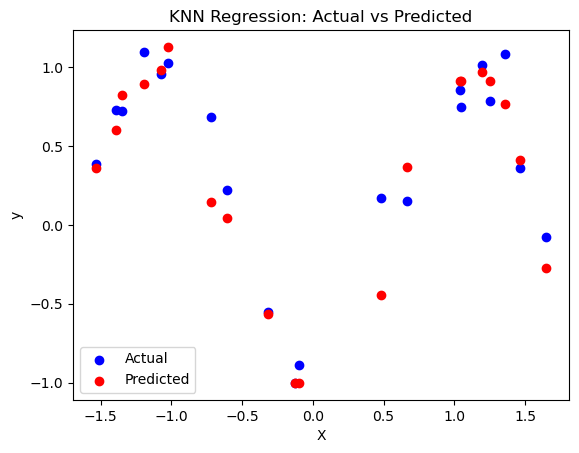

In [11]:
#22.	Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE) 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Random numbers between 0 and 10
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # Add some noise

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a KNN Regressor with K=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"KNN Regressor Mean Squared Error: {mse:.4f}")

# Plot predictions
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.scatter(X_test, y_pred, color='red', label="Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.title("KNN Regression: Actual vs Predicted")
plt.legend()
plt.show()


In [13]:
#23.	Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for distance-based models like KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN Classifier with Euclidean Distance (default metric)
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

# Train KNN Classifier with Manhattan Distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

# Compare Accuracy
print(f"KNN Accuracy with Euclidean Distance: {accuracy_euclidean:.2f}")
print(f"KNN Accuracy with Manhattan Distance: {accuracy_manhattan:.2f}")


KNN Accuracy with Euclidean Distance: 1.00
KNN Accuracy with Manhattan Distance: 1.00


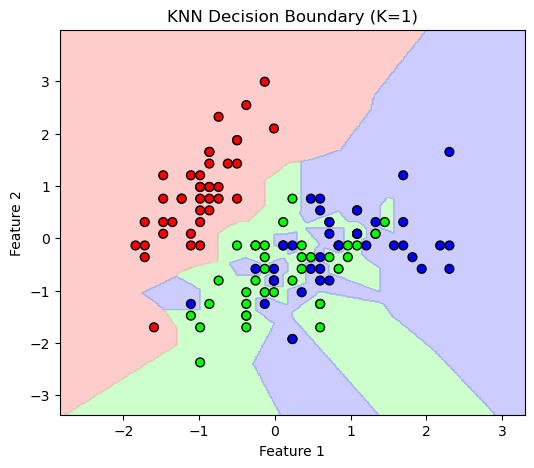

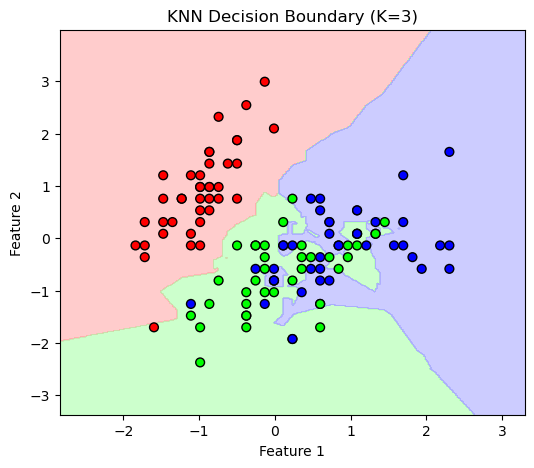

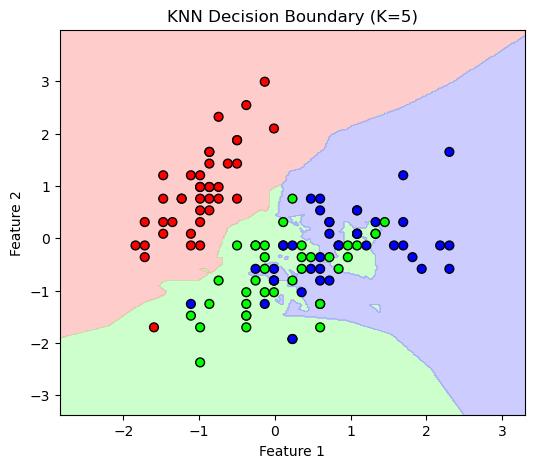

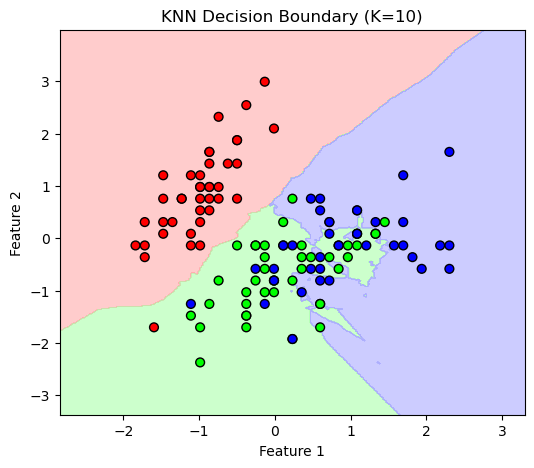

In [15]:
#24.	Train a KNN Classifier with different values of K and visualize decision boundarie 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Take only the first two features for 2D visualization
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_background = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
    cmap_points = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k', s=40)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

# Train and visualize for different values of K
for k in [1, 3, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundary(X_train, y_train, knn, f"KNN Decision Boundary (K={k})")


In [17]:
#25.	Apply Feature Scaling before training a KNN model and compare results with unscaled data 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN without Feature Scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Apply Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN with Feature Scaling
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Compare Accuracy
print(f"KNN Accuracy without Feature Scaling: {accuracy_unscaled:.2f}")
print(f"KNN Accuracy with Feature Scaling: {accuracy_scaled:.2f}")


KNN Accuracy without Feature Scaling: 1.00
KNN Accuracy with Feature Scaling: 1.00


Explained Variance Ratio for Each Component:
Principal Component 1: 0.2901
Principal Component 2: 0.2321
Principal Component 3: 0.1870
Principal Component 4: 0.1543
Principal Component 5: 0.1365


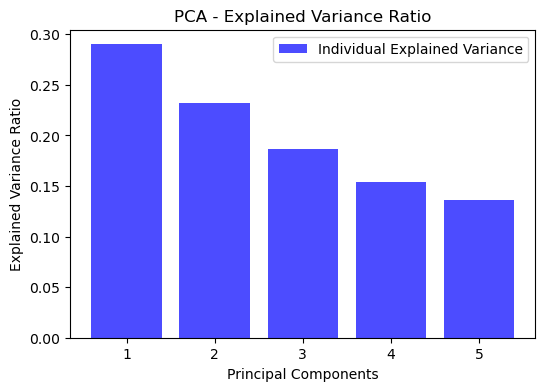

In [19]:
#26.	Train a PCA model on synthetic data and print the explained variance ratio for each component 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset (100 samples, 5 features)
np.random.seed(42)
X = np.random.rand(100, 5) * 10  # Random values between 0 and 10

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=5)  # Keep all 5 components
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio for each component
print("Explained Variance Ratio for Each Component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Plot explained variance
plt.figure(figsize=(6, 4))
plt.bar(range(1, 6), pca.explained_variance_ratio_, alpha=0.7, color='b', label="Individual Explained Variance")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA - Explained Variance Ratio")
plt.legend()
plt.show()


In [21]:
#27.	Apply PCA before training a KNN Classifier and compare accuracy with and without PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = knn_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

# Apply PCA (reduce to 2 principal components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train KNN with PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Compare Accuracy
print(f"KNN Accuracy without PCA: {accuracy_no_pca:.2f}")
print(f"KNN Accuracy with PCA (2 components): {accuracy_pca:.2f}")


KNN Accuracy without PCA: 1.00
KNN Accuracy with PCA (2 components): 0.93


In [23]:
#28.	 Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Try different K values
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Different distance metrics
    'weights': ['uniform', 'distance']  # Uniform vs. Distance-based weighting
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Training Accuracy: {grid_search.best_score_:.2f}")

# Evaluate on test set using the best model
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test_scaled, y_test)
print(f"Test Accuracy with Best Parameters: {test_accuracy:.2f}")


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Training Accuracy: 0.96
Test Accuracy with Best Parameters: 1.00


In [25]:
#29.	Train a KNN Classifier and check the number of misclassified samples 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn.predict(X_test_scaled)

# Count misclassified samples
misclassified_samples = (y_test != y_pred).sum()

# Print results
print(f"Total test samples: {len(y_test)}")
print(f"Misclassified samples: {misclassified_samples}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Total test samples: 30
Misclassified samples: 0
Accuracy: 1.00


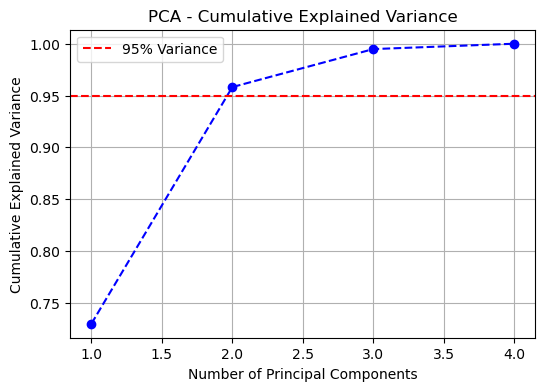

In [27]:
#30.	Train a PCA model and visualize the cumulative explained variance 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.legend()
plt.grid()
plt.show()


In [29]:
#31.	Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for distance-based algorithms like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN with uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train_scaled, y_train)
y_pred_uniform = knn_uniform.predict(X_test_scaled)
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)

# Train KNN with distance-based weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train_scaled, y_train)
y_pred_distance = knn_distance.predict(X_test_scaled)
accuracy_distance = accuracy_score(y_test, y_pred_distance)

# Compare Accuracy
print(f"KNN Accuracy with Uniform Weights: {accuracy_uniform:.2f}")
print(f"KNN Accuracy with Distance Weights: {accuracy_distance:.2f}")




KNN Accuracy with Uniform Weights: 1.00
KNN Accuracy with Distance Weights: 1.00


K=1, MSE=0.0412
K=3, MSE=0.0391
K=5, MSE=0.0352
K=10, MSE=0.0286
K=15, MSE=0.0361
K=20, MSE=0.0442


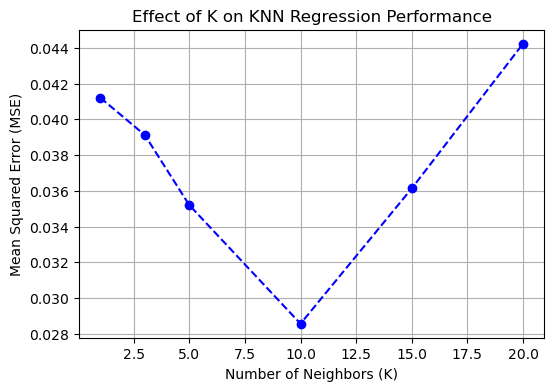

In [31]:
#32.	Train a KNN Regressor and analyze the effect of different K values on performance 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset (non-linear function)
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # Add some noise

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try different values of K and analyze performance
k_values = [1, 3, 5, 10, 15, 20]
mse_scores = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled, y_train)
    y_pred = knn_regressor.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"K={k}, MSE={mse:.4f}")

# Plot MSE vs. K values
plt.figure(figsize=(6, 4))
plt.plot(k_values, mse_scores, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of K on KNN Regression Performance")
plt.grid()
plt.show()


In [33]:
#33.	Implement KNN Imputation for handling missing values in a dataset 

import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a sample dataset with missing values
np.random.seed(42)
data = {
    'Feature1': [2, 4, np.nan, 8, 10, np.nan, 14, 16, 18, 20],
    'Feature2': [1, np.nan, 3, 4, 5, 6, np.nan, 8, 9, 10],
    'Feature3': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}
df = pd.DataFrame(data)

print("Original Dataset with Missing Values:")
print(df)

# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

print("\nDataset After KNN Imputation:")
print(df_imputed)


Original Dataset with Missing Values:
   Feature1  Feature2  Feature3
0       2.0       1.0        10
1       4.0       NaN        20
2       NaN       3.0        30
3       8.0       4.0        40
4      10.0       5.0        50
5       NaN       6.0        60
6      14.0       NaN        70
7      16.0       8.0        80
8      18.0       9.0        90
9      20.0      10.0       100

Dataset After KNN Imputation:
    Feature1   Feature2  Feature3
0   2.000000   1.000000      10.0
1   4.000000   2.666667      20.0
2   4.666667   3.000000      30.0
3   8.000000   4.000000      40.0
4  10.000000   5.000000      50.0
5  10.666667   6.000000      60.0
6  14.000000   6.333333      70.0
7  16.000000   8.000000      80.0
8  18.000000   9.000000      90.0
9  20.000000  10.000000     100.0


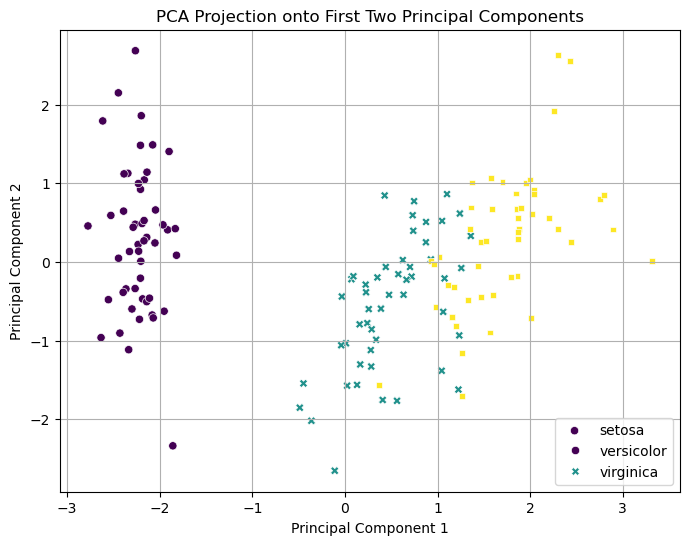

In [35]:
#34.	Train a PCA model and visualize the data projection onto the first two principal components 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="viridis", style=y, legend=True)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection onto First Two Principal Components")
plt.legend(labels=target_names)
plt.grid()
plt.show()


In [37]:
#35.	Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance 

import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for distance-based classifiers like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate KNN with different algorithms
def evaluate_knn(algorithm):
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algorithm)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    elapsed_time = time.time() - start_time
    return accuracy, elapsed_time

# Train and evaluate KNN with KD Tree
accuracy_kd, time_kd = evaluate_knn('kd_tree')

# Train and evaluate KNN with Ball Tree
accuracy_ball, time_ball = evaluate_knn('ball_tree')

# Print results
print(f"KNN (KD Tree) - Accuracy: {accuracy_kd:.2f}, Training Time: {time_kd:.4f} seconds")
print(f"KNN (Ball Tree) - Accuracy: {accuracy_ball:.2f}, Training Time: {time_ball:.4f} seconds")


KNN (KD Tree) - Accuracy: 1.00, Training Time: 0.0078 seconds
KNN (Ball Tree) - Accuracy: 1.00, Training Time: 0.0102 seconds


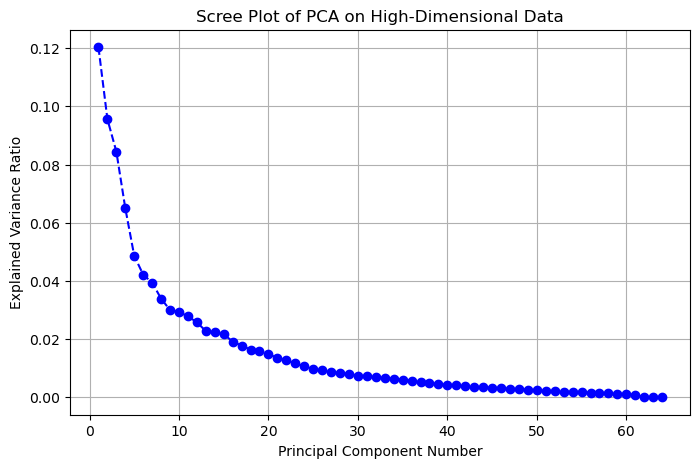

In [39]:

#36	Train a PCA model on a high-dimensional dataset and visualize the Scree plot 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

# Load the high-dimensional Digits dataset
digits = load_digits()
X = digits.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (keep all components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute explained variance
explained_variance = pca.explained_variance_ratio_

# Plot Scree Plot (Explained Variance vs. Principal Components)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot of PCA on High-Dimensional Data")
plt.grid()
plt.show()


In [41]:
#37.	Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for distance-based classifiers like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Evaluate performance using Precision, Recall, and F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



PCA Components: 1, Accuracy: 0.9000
PCA Components: 2, Accuracy: 0.9333
PCA Components: 3, Accuracy: 1.0000
PCA Components: 4, Accuracy: 1.0000


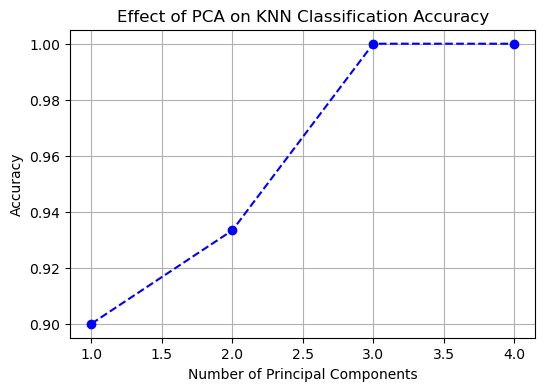

In [43]:
#38.	 Train a PCA model and analyze the effect of different numbers of components on accuracy 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Analyze accuracy with different numbers of principal components
components = [1, 2, 3, 4]  # Trying different numbers of principal components
accuracy_scores = []

for n in components:
    # Apply PCA with n components
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    
    # Predict and evaluate accuracy
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"PCA Components: {n}, Accuracy: {accuracy:.4f}")

# Plot Accuracy vs. Number of Components
plt.figure(figsize=(6, 4))
plt.plot(components, accuracy_scores, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.title("Effect of PCA on KNN Classification Accuracy")
plt.grid()
plt.show()


Leaf Size: 1, Accuracy: 1.0000
Leaf Size: 5, Accuracy: 1.0000
Leaf Size: 10, Accuracy: 1.0000
Leaf Size: 20, Accuracy: 1.0000
Leaf Size: 30, Accuracy: 1.0000
Leaf Size: 50, Accuracy: 1.0000


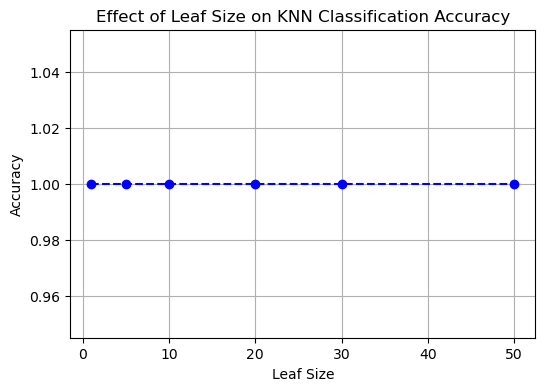

In [45]:
#39.	Train a KNN Classifier with different leaf_size values and compare accuracy 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different leaf_size values
leaf_sizes = [1, 5, 10, 20, 30, 50]
accuracy_scores = []

for leaf in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=leaf)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Leaf Size: {leaf}, Accuracy: {accuracy:.4f}")

# Plot Accuracy vs. Leaf Size
plt.figure(figsize=(6, 4))
plt.plot(leaf_sizes, accuracy_scores, marker='o', linestyle='--', color='b')
plt.xlabel("Leaf Size")
plt.ylabel("Accuracy")
plt.title("Effect of Leaf Size on KNN Classification Accuracy")
plt.grid()
plt.show()


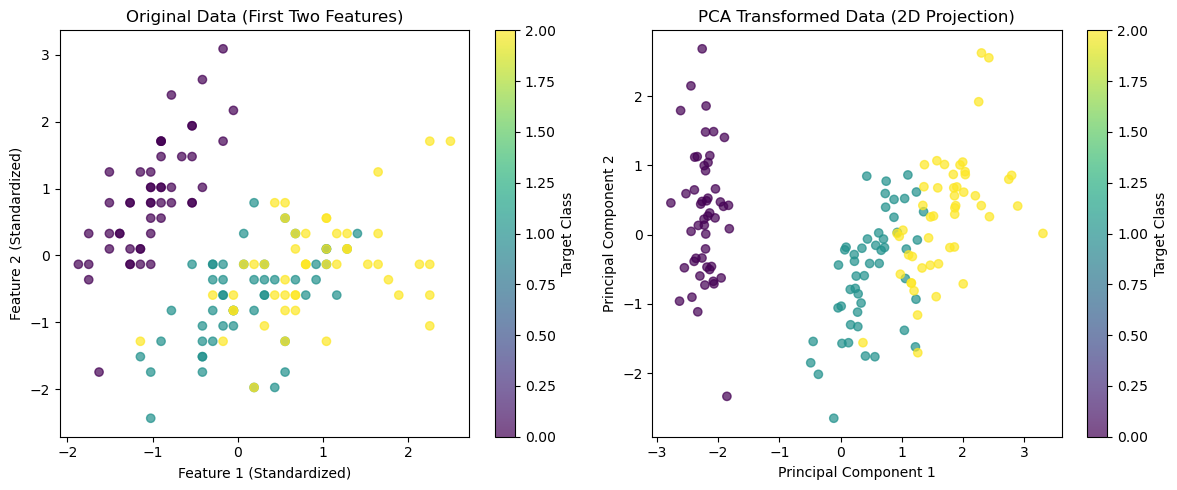

In [49]:
#40.	Train a PCA model and visualize how data points are transformed before and after PCA 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
target_names = iris.target_names

# Standardize the dataset (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot Original Data (first two features)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("Original Data (First Two Features)")
plt.colorbar(label="Target Class")

# Plot PCA Transformed Data
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data (2D Projection)")
plt.colorbar(label="Target Class")

plt.tight_layout()
plt.show()



In [51]:
#41.	Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for distance-based models like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))



Classification Report:
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.86      0.92        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



Metric: euclidean, MSE: 437.3545
Metric: manhattan, MSE: 437.3545


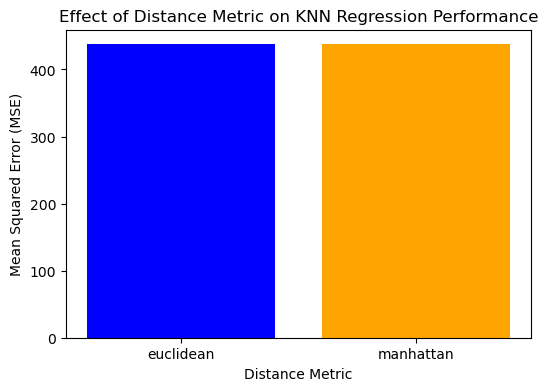

In [53]:
#42.	 Train a KNN Regressor and analyze the effect of different distance metrics on prediction error 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Create a synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for distance-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define different distance metrics
metrics = ['euclidean', 'manhattan']
mse_scores = {}

# Train and evaluate KNN Regressor with different metrics
for metric in metrics:
    knn_regressor = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_regressor.fit(X_train_scaled, y_train)
    
    # Predict on test data
    y_pred = knn_regressor.predict(X_test_scaled)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[metric] = mse
    print(f"Metric: {metric}, MSE: {mse:.4f}")

# Plot MSE for different distance metrics
plt.figure(figsize=(6, 4))
plt.bar(mse_scores.keys(), mse_scores.values(), color=['blue', 'orange'])
plt.xlabel("Distance Metric")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of Distance Metric on KNN Regression Performance")
plt.show()


Metric: euclidean, MSE: 437.3545
Metric: manhattan, MSE: 437.3545


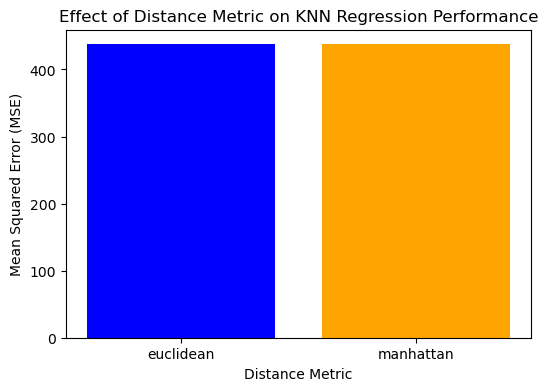

In [73]:
#43.	Train a KNN Classifier and evaluate using ROC-AUC score 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Create a synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for distance-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define different distance metrics
metrics = ['euclidean', 'manhattan']
mse_scores = {}

# Train and evaluate KNN Regressor with different metrics
for metric in metrics:
    knn_regressor = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_regressor.fit(X_train_scaled, y_train)
    
    # Predict on test data
    y_pred = knn_regressor.predict(X_test_scaled)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[metric] = mse
    print(f"Metric: {metric}, MSE: {mse:.4f}")

# Plot MSE for different distance metrics
plt.figure(figsize=(6, 4))
plt.bar(mse_scores.keys(), mse_scores.values(), color=['blue', 'orange'])
plt.xlabel("Distance Metric")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of Distance Metric on KNN Regression Performance")
plt.show()


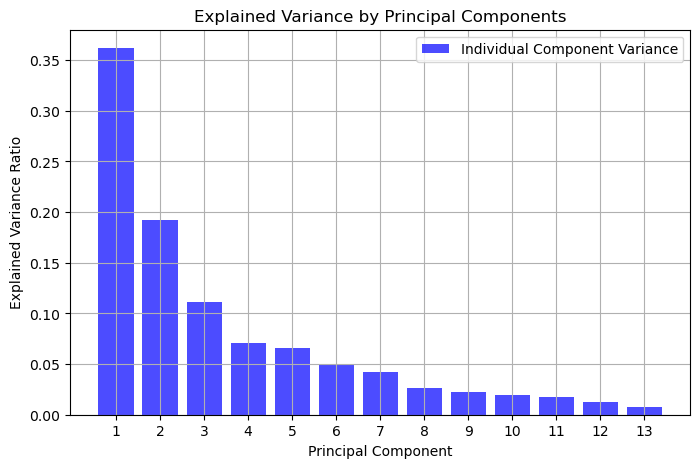

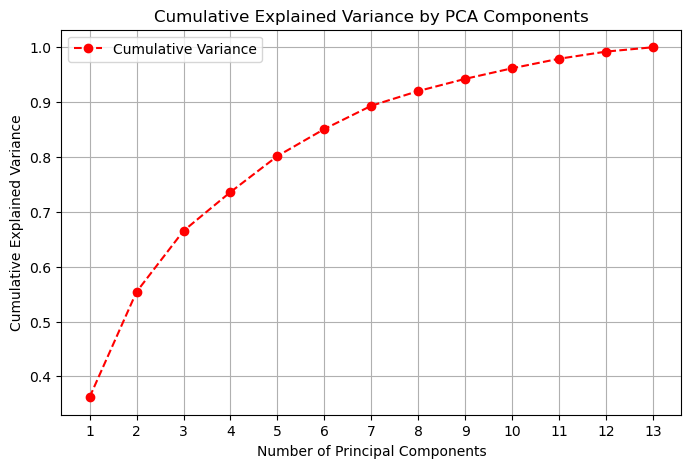

In [57]:
#44.	Train a PCA model and visualize the variance captured by each principal component 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Standardize the dataset (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (keep all components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue', label="Individual Component Variance")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components")
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid()
plt.show()

# Cumulative Explained Variance Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--', color='red', label="Cumulative Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by PCA Components")
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid()
plt.show()



In [59]:
#45.	Train a KNN Classifier and perform feature selection before training 

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Feature Selection (Select the top 10 best features)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Standardize the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after Feature Selection: {accuracy:.4f}")

# Print the selected feature indices
selected_features = selector.get_support(indices=True)
print("Selected feature indices:", selected_features)
print("Selected feature names:", np.array(data.feature_names)[selected_features])


Accuracy after Feature Selection: 0.9737
Selected feature indices: [ 0  2  3  6  7 20 22 23 26 27]
Selected feature names: ['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concavity' 'worst concave points']


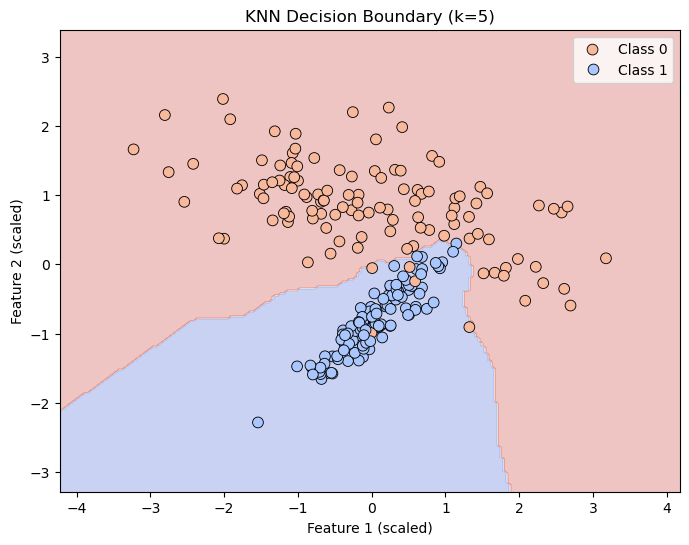

In [69]:
#46.	Train a PCA model and visualize the data reconstruction error after reducing dimensions 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate synthetic dataset (2 features for easy visualization)
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, 
                           n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predict on mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train, edgecolor='k', palette='coolwarm', s=60)
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("KNN Decision Boundary (k=5)")
plt.legend(["Class 0", "Class 1"])
plt.show()


In [67]:
#47.	Train a KNN Classifier and visualize the decision boundary 



ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

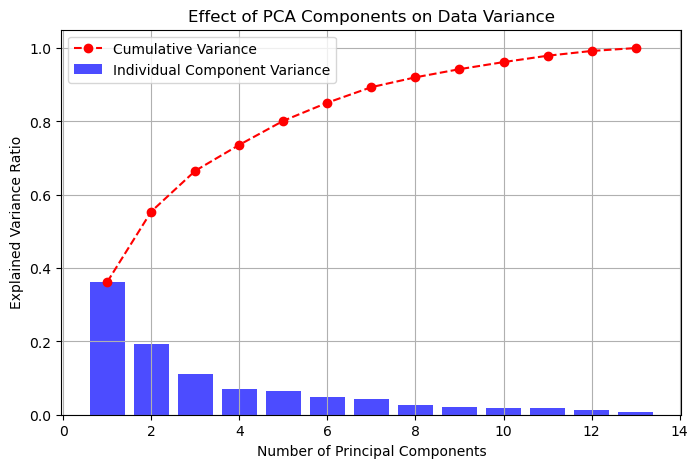

In [65]:
#48.	Train a PCA model and analyze the effect of different numbers of components on data variance.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance for different numbers of components
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='blue', label="Individual Component Variance")
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='red', label="Cumulative Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Effect of PCA Components on Data Variance")
plt.legend()
plt.grid()
plt.show()


